<h1>Hong Kong COVID-19 Cases</h1>
<h4>Author: Chang Dakota Sum Kiu</h4>
<h4>Last Modified: 17/09/2021</h4>


---


<p>This notebook uses the API from the Hong Kong government and analyses statistics of COVID-19 cases. Note: Not all the plots are labeled as it is intended for practice and not actual use. </p>

In [28]:
# import libraries
import requests
from io import StringIO
import pandas as pd
import seaborn as sns

In [7]:
# getting data from the API
url = "http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv"

source = requests.get(url).text
covid_data = StringIO(source)
covid = pd.read_csv(covid_data)

In [8]:
covid.head(4)

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56.0,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


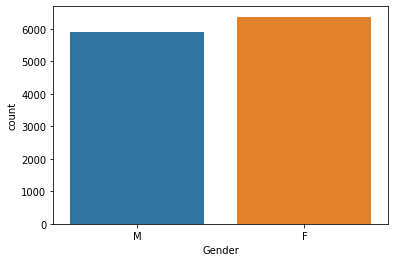

In [9]:
sns.countplot('Gender', data=covid)

In [10]:
covid['HK/Non-HK resident'].replace(['HK Resident', 'Non-HK Resident'], ['HK resident', 'Non-HK resident'], inplace=True)
covid['HK/Non-HK resident'].value_counts()

HK resident        11757
Non-HK resident      519
Name: HK/Non-HK resident, dtype: int64

In [12]:
covid.tail(4)

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
12277,12278,12/10/2021,Asymptomatic,M,56.0,NaN,Hospitalised,Non-HK resident,Imported case,Confirmed
12278,12279,13/10/2021,Asymptomatic,F,28.0,NaN,To be provided,HK resident,Imported case,Confirmed
12279,12280,13/10/2021,Asymptomatic,F,34.0,NaN,To be provided,HK resident,Imported case,Confirmed
12280,12281,13/10/2021,Asymptomatic,M,30.0,NaN,To be provided,HK resident,Imported case,Confirmed


In [13]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12281 entries, 0 to 12280
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Case no.                          12281 non-null  int64  
 1   Report date                       12281 non-null  object 
 2   Date of onset                     12276 non-null  object 
 3   Gender                            12276 non-null  object 
 4   Age                               12276 non-null  float64
 5   Name of hospital admitted         0 non-null      float64
 6   Hospitalised/Discharged/Deceased  12276 non-null  object 
 7   HK/Non-HK resident                12276 non-null  object 
 8   Case classification*              12276 non-null  object 
 9   Confirmed/probable                12281 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 959.6+ KB


In [14]:
covid['Hospitalised/Discharged/Deceased'].value_counts()

Discharged        11962
Deceased            213
Hospitalised         62
No admission         36
To be provided        3
Name: Hospitalised/Discharged/Deceased, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


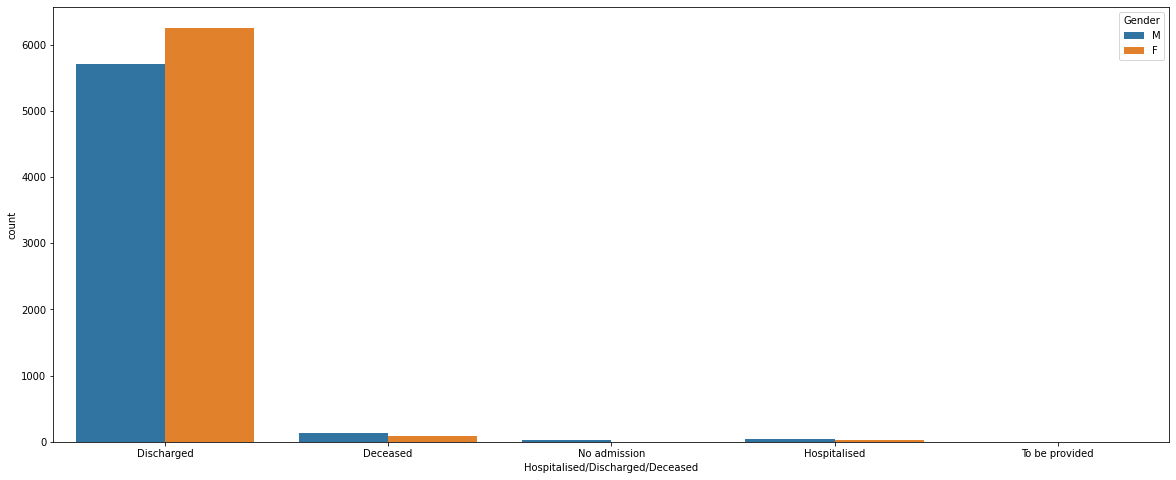

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
sns.countplot('Hospitalised/Discharged/Deceased', data=covid, hue='Gender')

In [16]:
covid['Case classification*'].value_counts()

Epidemiologically linked with local case             6021
Local case                                           3158
Imported case                                        2873
Possibly local case                                   103
Epidemiologically linked with possibly local case      62
Epidemiologically linked with imported case            59
Name: Case classification*, dtype: int64

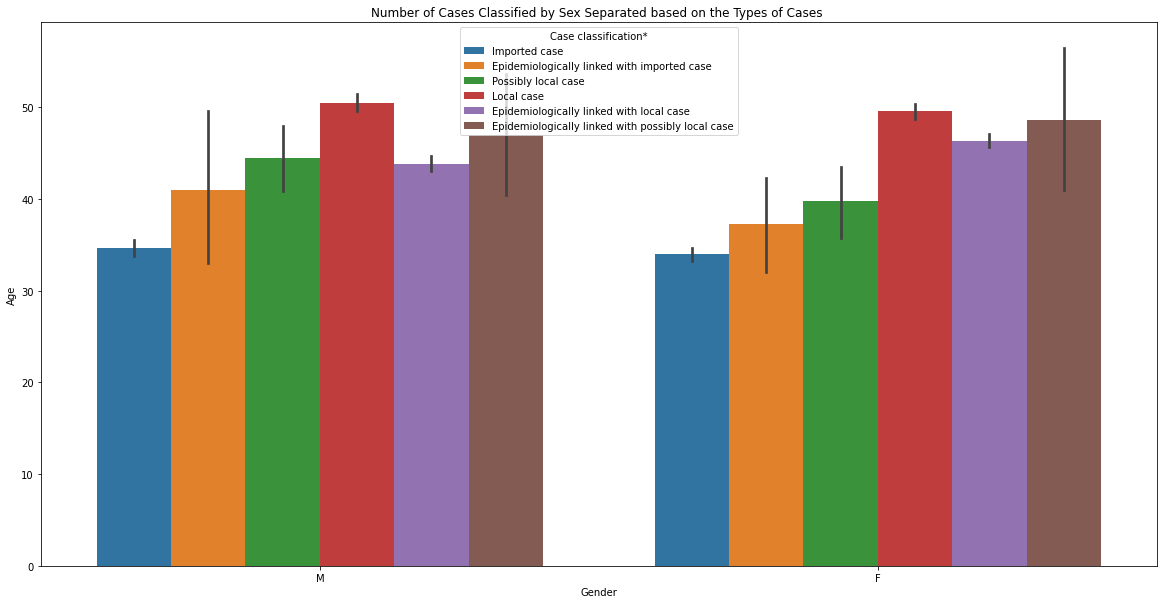

In [35]:
plt.figure(figsize=(20,10))
plt.title("Number of Cases Classified by Sex Separated based on the Types of Cases")
sns.barplot(x='Gender', y='Age', data=covid, hue='Case classification*')

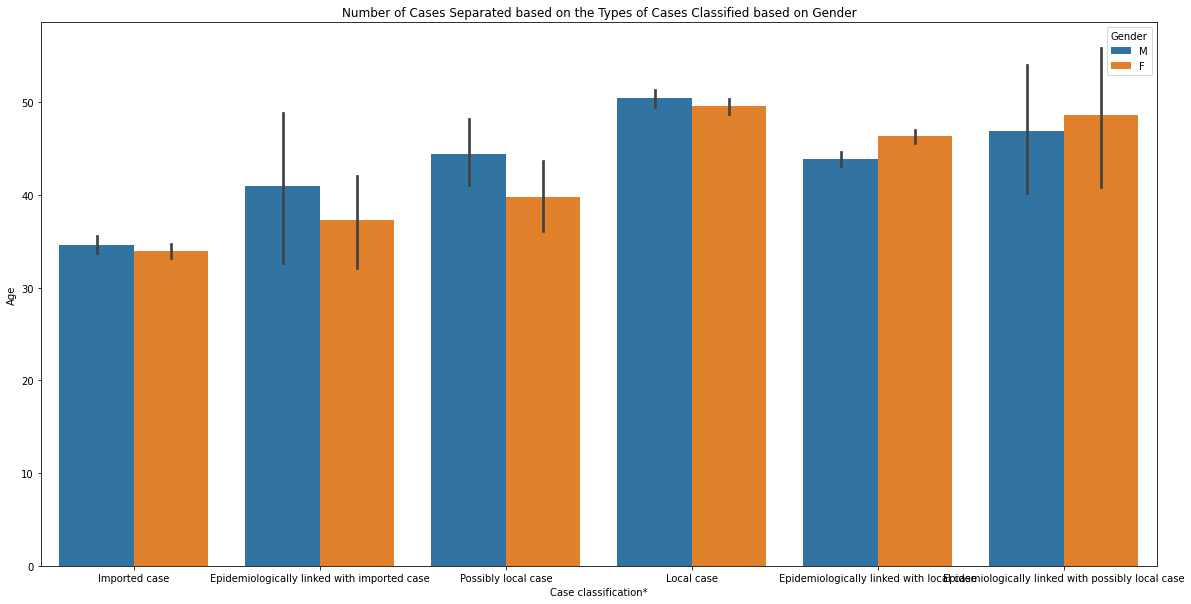

In [36]:
plt.figure(figsize=(20,10))
plt.title("Number of Cases Separated based on the Types of Cases Classified based on Gender")
sns.barplot(x='Case classification*', y='Age', data=covid, hue='Gender')

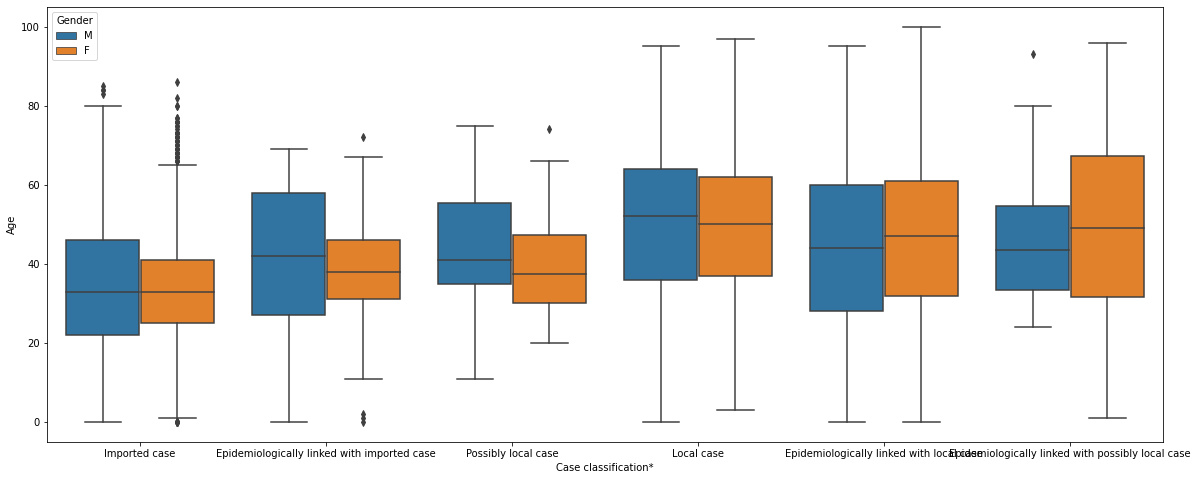

In [19]:
plt.figure(figsize=(20,8))

sns.boxplot(x='Case classification*', y='Age', data=covid, hue='Gender')

In [22]:
covid[covid['Gender'] == 'M']['Age'].describe()

count    5906.000000
mean       43.467321
std        20.231724
min         0.000000
25%        28.000000
50%        43.000000
75%        60.000000
max        95.000000
Name: Age, dtype: float64

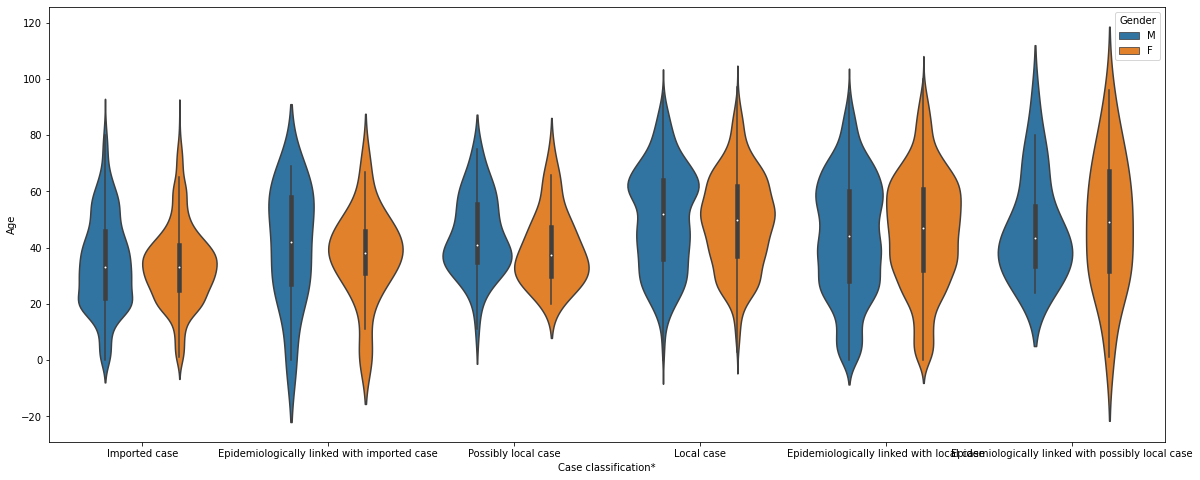

In [23]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Case classification*', y='Age', data=covid, hue='Gender')

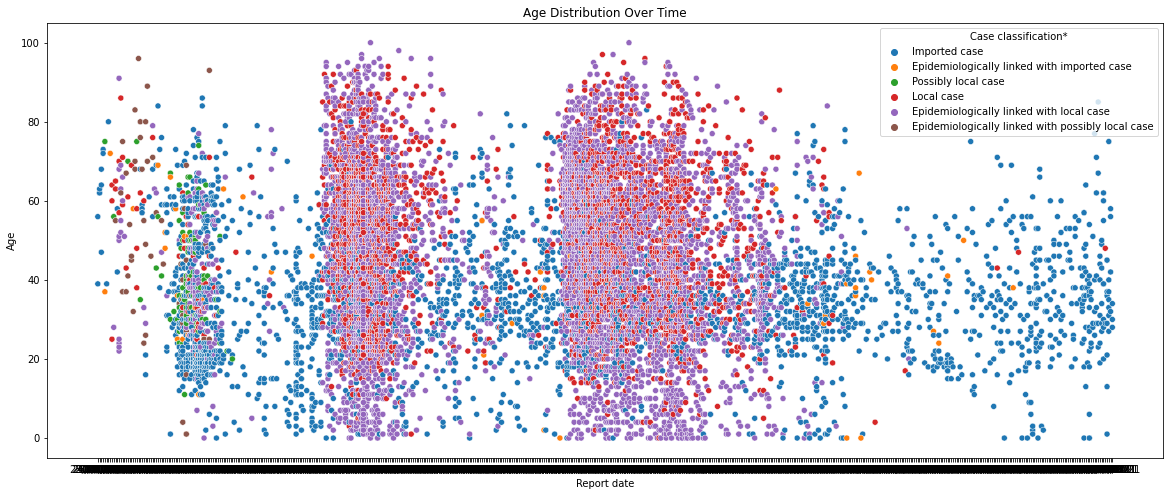

In [33]:
plt.figure(figsize=(20,8))
plt.title("Age Distribution Over Time")
sns.scatterplot(x='Report date', y='Age', data=covid, hue='Case classification*')

In [25]:
covid['Report year'] = covid['Report date'].apply(lambda x:x.split('/')[-1])
covid['Report month'] = covid['Report date'].apply(lambda x:x[3:5])

In [26]:
covid[covid['Report year'] == '2020']['Report month'].value_counts()

12    2532
07    2066
08    1539
11     991
03     620
04     323
09     277
10     236
06     121
02      82
05      47
01      13
Name: Report month, dtype: int64

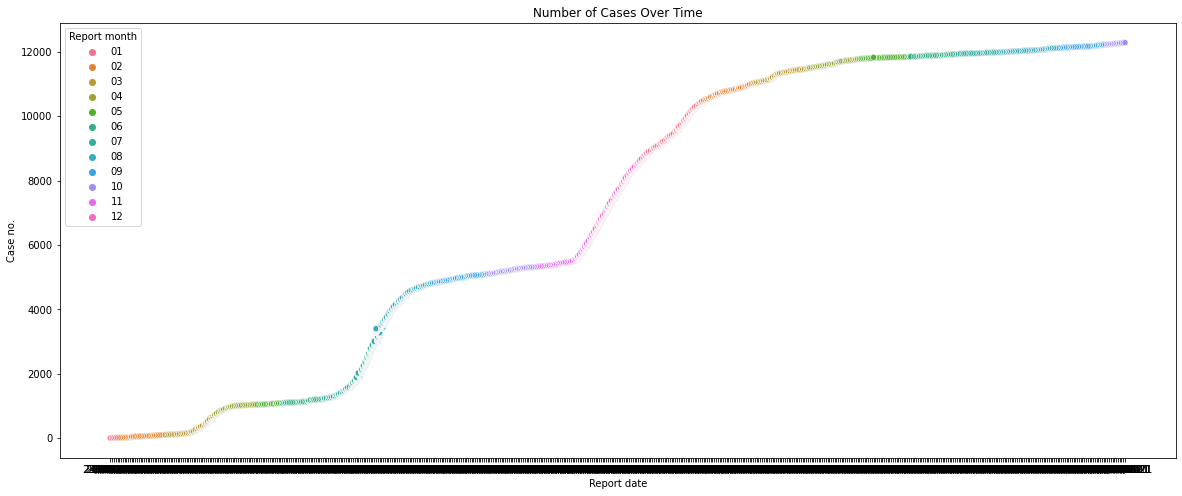

In [32]:
plt.figure(figsize=(20,8))
plt.title("Number of Cases Over Time")
sns.scatterplot(x='Report date', y='Case no.', data=covid, hue='Report month')